# Johnson300 vs Johnson120

In [2]:
import pandas as pd
import numpy as np
import pylab as plt
from scipy.spatial.distance import euclidean,cdist

In [3]:
clusGerlach = pd.read_csv('data/clusters/Gerlach_clusters.csv', index_col=0)

In [4]:
clusGerlach

,N,E,O,A,C
Average,0.55,0.51,-0.60,0.25,0.25
SelfCentered,-0.23,0.70,-0.75,-0.56,-0.44
Reserved,-0.54,-0.07,-0.77,0.12,0.19
RoleModel,-0.70,0.52,0.23,0.62,0.78


In [14]:
clusPascal = pd.DataFrame(np.load('data/clusters/Pascal_clusters_Nc14_TIPInormed.npy'),columns=['N','E','O','A','C'])

In [7]:
clus120 = pd.DataFrame(np.load('data/clusters/Johnson120_clusters_Nc18.npy'),columns=['N','E','O','A','C'])

In [8]:
clus120

,N,E,O,A,C
0,-0.913556,0.480593,0.497881,0.452075,0.857996
1,0.824866,0.616444,-0.655940,-0.411651,-0.474065
2,-0.673587,-0.472493,-0.671561,0.391340,0.436308
3,0.047312,0.497026,-0.236810,0.798765,0.311571
4,-0.374951,0.372290,-0.468095,-0.305500,0.176265


In [16]:
distancesG = cdist(clusGerlach, clusGerlach, metric='euclidean')
distancesG

array([[0.        , 1.34134261, 1.25455171, 1.63379925],
       [1.34134261, 0.        , 1.24446776, 2.02348709],
       [1.25455171, 1.24446776, 0.        , 1.40420796],
       [1.63379925, 2.02348709, 1.40420796, 0.        ]])

In [9]:
distances = cdist(clus120, clusGerlach, metric='euclidean')

In [10]:
distdf = pd.DataFrame(distances, columns = ['Average','SelfCentered','Reserved','RoleModel'])
distdf

,Average,SelfCentered,Reserved,RoleModel
0,1.938736,2.186707,1.614532,0.391410
1,1.025701,1.073191,1.752343,2.399247
2,1.588164,1.802949,0.569060,1.403197
3,0.830484,1.671097,1.194256,1.014050
4,1.098141,0.807730,0.703738,1.354938


In [13]:
distdf[distdf<1]

,Average,SelfCentered,Reserved,RoleModel
0,NaN,NaN,NaN,0.39141
1,NaN,NaN,NaN,NaN
2,NaN,NaN,0.569060,NaN
3,0.830484,NaN,NaN,NaN
4,NaN,0.80773,0.703738,NaN


In [64]:
clusPascal.iloc[3]
clusGerlach.loc['RoleModel']

N   -0.70
E    0.52
O    0.23
A    0.62
C    0.78
Name: RoleModel, dtype: float64

## Cluster matches

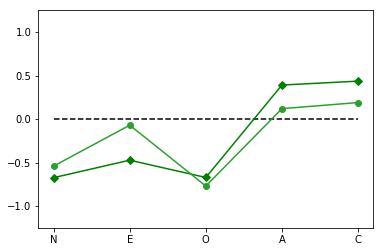

In [17]:
r = '#d62728'
g = '#2ca02c'
y = '#ff7f0e'
b = '#1f77b4'
plt.plot(['N','E','O','A','C'],clus120.iloc[2], marker='D', color='g')
plt.plot(['N','E','O','A','C'],clusGerlach.loc['Reserved'], marker='o', color=g)
plt.ylim(-1.25,1.25)
plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')

### Self-Centered

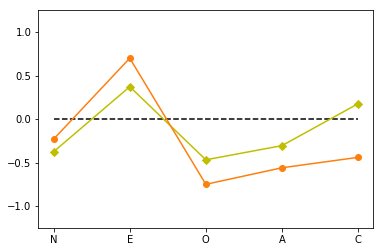

In [19]:
plt.plot(['N','E','O','A','C'],clus120.iloc[4], marker='D', color='y')
plt.plot(['N','E','O','A','C'],clusGerlach.loc['SelfCentered'], marker='o', color=y)
plt.ylim(-1.25,1.25)
plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')

### Average

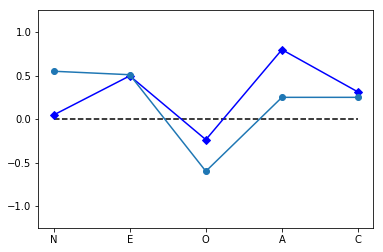

In [21]:
plt.plot(['N','E','O','A','C'],clus120.iloc[3], marker='D', color='b')
plt.plot(['N','E','O','A','C'],clusGerlach.loc['Average'], marker='o', color=b)
plt.ylim(-1.25,1.25)
plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')

### Role Model

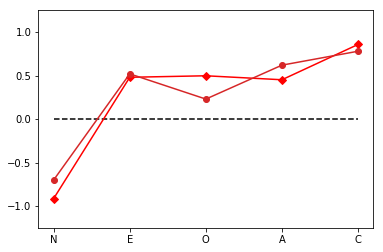

In [22]:
plt.plot(['N','E','O','A','C'],clus120.iloc[0], marker='D', color='r')
plt.plot(['N','E','O','A','C'],clusGerlach.loc['RoleModel'], marker='o', color=r)
plt.ylim(-1.25,1.25)
plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')

### Other

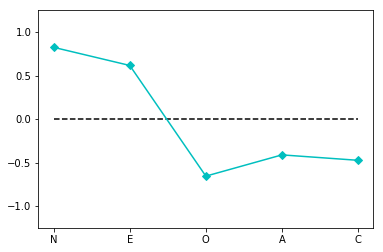

In [23]:
plt.plot(['N','E','O','A','C'],clus120.iloc[1], marker='D', color='c')
plt.ylim(-1.25,1.25)
plt.hlines(y=0,xmin='N',xmax='C',linestyles='dashed')